In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. 데이터 불러오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_label = pd.DataFrame(iris.target, columns=['label'])
df_label.head(3)

,label
0,0
1,0
2,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#2. 데이터 정규화
> 이전에 실습했던 DecisionTreeClaasifier알고리즘과
아래 그램에서 나온 Linear SVC, 그리고 KNeighborsClassifier. 이 세가지를 비교해보겠다. 

> Linear SVC를 사용하기위해 데이터 표준화를 진행한다.

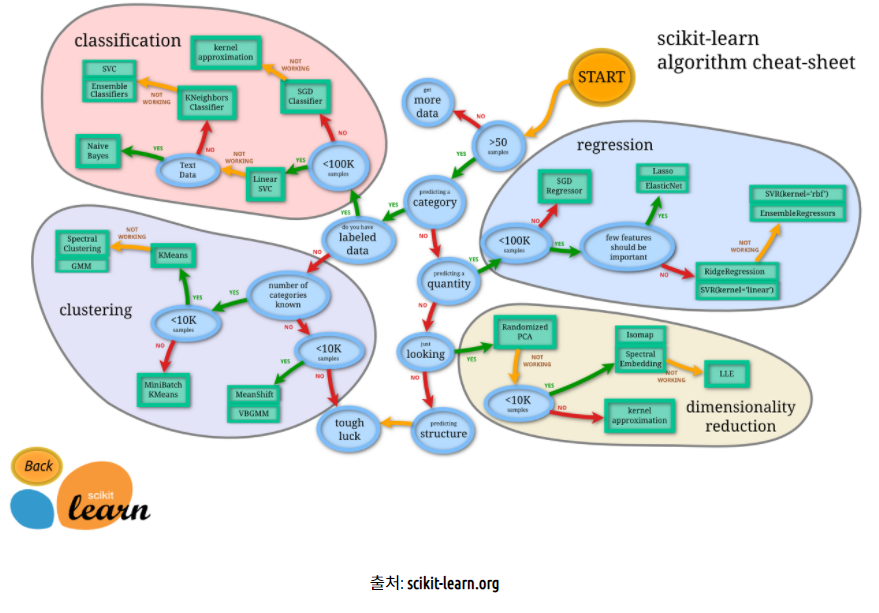

##2.1 StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_data)
data_scaled = scaler.transform(df_data)

df_data_scaled = pd.DataFrame(data_scaled, columns=df_data.columns)
#df_data_scaled.head(3)

print('평균 : ')
print(round(df_data_scaled.mean(), 2))
print('분산 : ')
print(round(df_data_scaled.var(), 2))

평균 : 
sepal length (cm)   -0.0
sepal width (cm)    -0.0
petal length (cm)   -0.0
petal width (cm)    -0.0
dtype: float64
분산 : 
sepal length (cm)    1.01
sepal width (cm)     1.01
petal length (cm)    1.01
petal width (cm)     1.01
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_data)
data_normalized = scaler.transform(df_data)

df_data_normalized = pd.DataFrame(data_normalized, columns=df_data.columns)
df_data_normalized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


#3. 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

#원본데이터
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.25, random_state=7)

#표준화된 데이터
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(df_data_scaled, df_label, test_size=0.25, random_state=7)

#정규화된 데이터
X_normalized_train, X_normalized_test, y_train, y_test = train_test_split(df_data_normalized, df_label, test_size=0.25, random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#디시전 트리
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

#리니어 SVC
LSVC = LinearSVC()
LSVC.fit(X_scaled_train, y_train)

#KNeighbors
KNC = KNeighborsClassifier()
KNC.fit(X_normalized_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#4. 정확도 평가하기

In [ ]:
print('디시전 트리 : ', round(DTC.score(X_test, y_test), 2))
print('리니어 SVC : ', round(LSVC.score(X_scaled_test, y_test), 2))
print('KNeighbors : ', round(KNC.score(X_normalized_test, y_test), 2))

디시전 트리 :  0.92
리니어 SVC :  0.79
KNeighbors :  0.95


> 90%를 넘은 디시전트리와, KNeighbor에 비해 리니어 SVC는 성능이 안좋게 나온 것을 볼 수 있다.

In [ ]:
#리니어 SVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
print('리니어 SVC : ', round(LSVC.score(X_scaled_test, y_test), 2))

LSVC = LinearSVC()
LSVC.fit(X_normalized_train, y_train)
print('리니어 SVC : ', round(LSVC.score(X_scaled_test, y_test), 2))

리니어 SVC :  0.68
리니어 SVC :  0.71


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 각 다른 데이터로 해봐도 성능이 더욱 떨어졌다. 이는 iris데이터가 음수가 존재하지 않고, 각 데이터의 차이? 값? 이 중요한 데이터라 그런것이라 추측해본다.

#5. 튜닝하기

##5.1 DecisionTreeClassifier

In [ ]:
def get_best_hyperparam_DTC(max_depth_list, min_samples_split_list, min_samples_leaf_list):
  DTCparams = {
      'max_depth' : max_depth_list,
      'min_samples_split' : min_samples_split_list,
      'min_samples_leaf' : min_samples_leaf_list
  }

  grid_cv = GridSearchCV(DTC, param_grid=DTCparams, cv=5)
  grid_cv.fit(X_train, y_train)

  print('\n\n\n\n\n=====================================================================')
  print('최고 점수 : ', grid_cv.best_score_)
  print('최적의 파라미터 : ', grid_cv.best_params_)
  print('=====================================================================\n\n\n\n\n')

max_depth_list = range(6, 16, 1)
min_samples_split_list = range(30, 50, 1)
min_samples_leaf_list = range(1, 5, 1)
get_best_hyperparam_DTC(max_depth_list, min_samples_split_list, min_samples_leaf_list)






최고 점수 :  0.9731225296442687
최적의 파라미터 :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 32}







>최고 점수 :  0.9731225296442687

> 최적의 파라미터 :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 32}

##5.2 Linear SVC

In [ ]:
def get_best_hyperparam_LSVC(C_list):
  LSVCparams = {
      'C' : C_list,
    'penalty' : ['l1', 'l2']
  }
  grid_cv = GridSearchCV(LSVC, param_grid=LSVCparams, cv=5)
  grid_cv.fit(X_scaled_train, y_train)

  print('\n\n\n\n\n=====================================================================')
  print('최고 점수 : ', grid_cv.best_score_)
  print('최적의 파라미터 : ', grid_cv.best_params_)
  print('=====================================================================\n\n\n\n\n')

C_list = range(1, 20, 1)

get_best_hyperparam_LSVC(C_list)

> 최고 점수 :  0.9640316205533598

> 최적의 파라미터 :  {'C': 4, 'penalty': 'l2'}

##5.3 KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
def get_best_hyperparam_KNC(n_neighbors_list):
  KNCparams = {
      'n_neighbors' : n_neighbors_list,
      'weights' : ['uniform', 'distance'],
      'metric' : ['euclidean', 'mangattan', 'minkowaski']
  }

  grid_cv = GridSearchCV(KNC, param_grid=KNCparams, cv=5)
  grid_cv.fit(X_normalized_train, y_train)

  print('\n\n\n\n\n=====================================================================')
  print('최고 점수 : ', grid_cv.best_score_)
  print('최적의 파라미터 : ', grid_cv.best_params_)
  print('=====================================================================\n\n\n\n\n')

n_neighbors_list = range(1, 30, 1)
get_best_hyperparam_KNC(n_neighbors_list)

> 최고 점수 :  0.98

> 최적의 파라미터 :  {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}

#6. 최적화 적용

In [ ]:
#디시전트리
DTCparams = {
    'max_depth' : 6,
    'min_samples_split' : 32,
    'min_samples_leaf' : 1
}
DTC = DecisionTreeClassifier(max_depth=6, min_samples_split=32, min_samples_leaf=1)
DTC.fit(X_train, y_train)

#Linear SVC
LSVCparams = {
    'C' : 4,
  'penalty' : 'l2'
}
LSVC = LinearSVC(C=4, penalty='l2')
LSVC.fit(X_scaled_train, y_train)

#Kneighbors
KNCparams = {
  'n_neighbors' : 20,
  'weights' : 'uniform',
  'metric' : 'euclidean'
}
KNC = KNeighborsClassifier(n_neighbors=20, weights='uniform', metric='euclidean')
KNC.fit(X_normalized_train, y_train)

score = """
  Score
    DecisionTreeClassifier : {0}
    Linear SVC : {1}
    KNeighborsClassifier : {2}
""".format(round(DTC.score(X_test, y_test),5), round(LSVC.score(X_scaled_test, y_test),5), round(KNC.score(X_normalized_test, y_test), 5))

print(score)


  Score
    DecisionTreeClassifier : 0.92105
    Linear SVC : 0.86842
    KNeighborsClassifier : 0.92105



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


#7. 파일로 저장하기

In [ ]:
from sklearn.externals import joblib

save_medel_filepath = '/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/9.K-최근접 이웃/model/'

joblib.dump(DTC, save_medel_filepath+'DecisionTreeClassifier.pkl')
joblib.dump(LSVC, save_medel_filepath+'LinearSVC.pkl')
joblib.dump(KNC, save_medel_filepath+'KNeighborsClassifier.pkl')

['/content/drive/MyDrive/Colab Notebooks/Lec6_머신러닝_무작정따라하기/9.K-최근접 이웃/model/KNeighborsClassifier.pkl']

#강사님코드

##1. 데이터 일기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

##2. 모델 만들기

###2.1 데이터 분류

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=62)
X_train[:3]


array([[5.9, 3. , 5.1, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 3. , 4.9, 1.8]])

###2.2 모델 생성

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

###2.3 모델 정확도 평가하기

In [7]:
knn_clf.score(X_test, y_test)

0.9473684210526315

##3. 교차 검증

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(knn_clf, X=iris.data, y=iris.target, scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


##4. 모델 튜닝하기 (하이퍼 파라미터)

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
def get_best_hyperparam_KNC(n_neighbors_list):
  params = {
      'n_neighbors' : n_neighbors_list,
      'weights' : ['uniform', 'distance'],
      'metric' : ['euclidean', 'mangattan', 'minkowaski']
  }

  grid_cv = GridSearchCV(knn_clf, param_grid=params, cv=5)
  grid_cv.fit(X_train, y_train)

  print('\n\n\n\n\n=====================================================================')
  print('최고 점수 : ', grid_cv.best_score_)
  print('최적의 파라미터 : ', grid_cv.best_params_)
  print('=====================================================================\n\n\n\n\n')

n_neighbors_list = range(1, 30, 1)
get_best_hyperparam_KNC(n_neighbors_list)


> - 최고 점수 :  0.9818181818181818
- 최적의 파라미터 :  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
n_neighbors_list = range(10, 30, 1)
get_best_hyperparam_KNC(n_neighbors_list)


> - 최고 점수 :  0.9818181818181818
- 최적의 파라미터 :  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}